# Hands-on Pandas library

It is a Python package providing fast, flexible, and expressive data structures designed to working “relational” or “labeled” data both easy and intuitive.  
It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.  

The best way to think about the pandas data structures is as flexible containers for lower dimensional data.  
For example, DataFrame is a container for Series, and Series is a container for scalars.  
We would like to be able to insert and remove objects from these containers in a dictionary-like fashion.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))

Pandas Version: 1.0.5
Numpy Version: 1.18.5


## Pandas Dataframe
A DataFrame is a 2-dimensional data structure that can store data of different types in columns.  
It is similar to a spreadsheet, a SQL table or the data.frame in R.

In [2]:
dict = {
        "country": ["Brazil", "Russia", "India", "China", "South Africa"],
        "capital": ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria"],
        "area": [8.516, 17.10, 3.286, 9.597, 1.221],
        "population": [200.4, 143.5, 1252, 1357, 52.98]
        }

brics = pd.DataFrame(dict)
brics.index = ["BR", "RU", "IN", "CH", "SA"]

# The above lines can be fused into one.
# brics = pd.DataFrame(dict, index=["BR", "RU", "IN", "CH", "SA"])
# print(brics)
brics[0:4]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5
IN,India,New Dehli,3.286,1252.0
CH,China,Beijing,9.597,1357.0


In [3]:
print("Maximum area in brics:", brics["area"].max())
print("Manimum area in brics:", brics["area"].min())

print("\nDescribe area in brics\n" + str(brics["area"].describe()))

print("\nShape of brics:", brics.shape)

# print("\nCountries in brics\n" + str(brics.capital))
print("\nCountries in brics\n" + str(brics["capital"]))

Maximum area in brics: 17.1
Manimum area in brics: 1.221

Describe area in brics
count     5.000000
mean      7.944000
std       6.200557
min       1.221000
25%       3.286000
50%       8.516000
75%       9.597000
max      17.100000
Name: area, dtype: float64

Shape of brics: (5, 4)

Countries in brics
BR     Brasilia
RU       Moscow
IN    New Dehli
CH      Beijing
SA     Pretoria
Name: capital, dtype: object


## Indexing Operators in Pandas
The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. 

As a novice, this makes them easy to pick up and use.  
However, pandas has its own accessor operators, loc and iloc. For more advanced operations, these are the ones you're supposed to be using.  

Pandas indexing works in one of two paradigms.  
Index-based selection: selecting data based on its numerical position in the data. iloc follows this paradigm.  
Label-based selection: selection is based on data index value, not its position, which matters, .loc operator is used for this.

In [4]:
# returns the 1st row data
print(brics.iloc[0], end="\n\n")

# returns all the rows of 1st column
print(brics.iloc[:, 0], end="\n\n")

# returns all the rows of all the columns
print(brics.iloc[:, :], end="\n\n")

# returns the 2nd and 3rd rows of 1st and 2nd columns
print(brics.iloc[1:3, 0:2])

country         Brazil
capital       Brasilia
area             8.516
population       200.4
Name: BR, dtype: object

BR          Brazil
RU          Russia
IN           India
CH           China
SA    South Africa
Name: country, dtype: object

         country    capital    area  population
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Dehli   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98

   country    capital
RU  Russia     Moscow
IN   India  New Dehli


In [5]:
# returns the 1st row data
print(brics.loc["BR"], end="\n\n")


# returns all the rows of 1st column
print(brics.loc[:, "country"], end="\n\n")

# returns all the rows of all the columns
print(brics.loc[:, ["country", "capital", "area", "population"]], end="\n\n")

# returns the 2nd and 3rd rows of 1st and 2nd columns
print(brics.loc[["RU", "IN"], ["country", "capital"]])

country         Brazil
capital       Brasilia
area             8.516
population       200.4
Name: BR, dtype: object

BR          Brazil
RU          Russia
IN           India
CH           China
SA    South Africa
Name: country, dtype: object

         country    capital    area  population
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Dehli   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98

   country    capital
RU  Russia     Moscow
IN   India  New Dehli


In [6]:
print(brics.capital.value_counts())

Beijing      1
Pretoria     1
Brasilia     1
Moscow       1
New Dehli    1
Name: capital, dtype: int64


## Pandas Series
Each column in a DataFrame is a Series

In [7]:
ages = pd.Series([22, 35, 58], name="Age")
print(ages)

0    22
1    35
2    58
Name: Age, dtype: int64


## Reading files in Pandas

Pandas provides the read_csv() function to read data stored as a csv file into a pandas DataFrame.  
It supports many different file formats or data sources out of the box (csv, excel, sql, json, parquet, …), each of them with the prefix read_*.  
The usage of the index_col and parse_dates parameters of the read_csv function to define the first (0th) column as index of the resulting DataFrame and convert the dates in the column to Timestamp objects, respectively.

In [8]:
titanic = pd.read_csv("titanic-data.csv", index_col=0, parse_dates=True)
titanic.head(10)

# creates the "titanic-data.json" file
# titanic.to_json("titanic-data.json")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Shape of titanic: (891, 11)
type of ages: <class 'pandas.core.series.Series'>
type of age_sex: <class 'pandas.core.frame.DataFrame'>
Shape of age_above_35: (217, 11)
Shape of age_no_na: (714, 11)


<AxesSubplot:xlabel='Age', ylabel='Fare'>

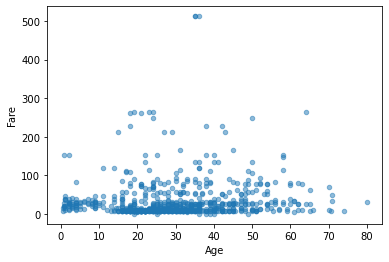

In [9]:
print("Shape of titanic:", titanic.shape)

ages = titanic["Age"]
print("type of ages:", type(ages))

age_sex = titanic[["Age", "Sex"]]
print("type of age_sex:", type(age_sex))

age_above_35 = titanic[titanic["Age"] > 35]
print("Shape of age_above_35:", age_above_35.shape)

age_no_na = titanic[titanic["Age"].notna()]
print("Shape of age_no_na:", age_no_na.shape)

# age_and_fare = titanic[["Age", "Fare"]]
# age_and_fare = titanic[age_and_fare.notna()]
# age_and_fare.plot()

titanic.plot.scatter(x="Age", y="Fare", alpha=0.5)

In [10]:
# What is the average age for male versus female Titanic passengers?
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [11]:
titanic.groupby("Sex").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


## Manipulating textual data

In [12]:
titanic["Name"].str.lower()

PassengerId
1                                braund, mr. owen harris
2      cumings, mrs. john bradley (florence briggs th...
3                                 heikkinen, miss. laina
4           futrelle, mrs. jacques heath (lily may peel)
5                               allen, mr. william henry
                             ...                        
887                                montvila, rev. juozas
888                         graham, miss. margaret edith
889             johnston, miss. catherine helen "carrie"
890                                behr, mr. karl howell
891                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [13]:
titanic["Name"].str.split(",").str.get(0)

PassengerId
1         Braund
2        Cumings
3      Heikkinen
4       Futrelle
5          Allen
         ...    
887     Montvila
888       Graham
889     Johnston
890         Behr
891       Dooley
Name: Name, Length: 891, dtype: object

In [14]:
titanic["Name"].str.len()

PassengerId
1      23
2      51
3      22
4      44
5      24
       ..
887    21
888    28
889    40
890    21
891    19
Name: Name, Length: 891, dtype: int64

In [15]:
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M", "female": "F"})
titanic[["Name", "Age", "Sex_short", "Survived"]]

,Name,Age,Sex_short,Survived
PassengerId,,,,
1,"Braund, Mr. Owen Harris",22.0,M,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,F,1
3,"Heikkinen, Miss. Laina",26.0,F,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,F,1
5,"Allen, Mr. William Henry",35.0,M,0
...,...,...,...,...
887,"Montvila, Rev. Juozas",27.0,M,0
888,"Graham, Miss. Margaret Edith",19.0,F,1
889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,F,0
